In [84]:
import random
import pandas as pd

# Define constants for service categories
SERVICE_CATEGORIES = [
    "houseCleaning", "electricity", "plumbing", "gardening", "painting", "carpentry", 
    "pestControl", "acRepair", "vehicleRepair", "applianceInstallation", "itSupport", 
    "homeSecurity", "interiorDesign", "windowCleaning", "furnitureAssembly"
]

# New Algerian cities with lat/lon ranges
# New Algerian cities with lat/lon ranges for the most populated cities, including Tébessa, Constantine, and Algiers
algerian_cities = {
    "Algiers": {"lat_min": 36.6, "lat_max": 36.9, "lon_min": 2.9, "lon_max": 3.2},
    "Oran": {"lat_min": 35.6, "lat_max": 35.8, "lon_min": -0.8, "lon_max": -0.5},
    "Constantine": {"lat_min": 36.2, "lat_max": 36.4, "lon_min": 6.5, "lon_max": 6.7},
    "Annaba": {"lat_min": 36.8, "lat_max": 37.1, "lon_min": 7.6, "lon_max": 7.8},
    "Blida": {"lat_min": 36.4, "lat_max": 36.7, "lon_min": 2.5, "lon_max": 3.2},
    "Sétif": {"lat_min": 35.5, "lat_max": 36.6, "lon_min": 5.3, "lon_max": 6.5},
    "Tébessa": {"lat_min": 34.5, "lat_max": 35.8, "lon_min": 7.5, "lon_max": 8.7}
}

# Helper function to add random perturbation
def add_random_offset(location):
    lat, lon = location
    # Apply small random perturbation (normal distribution with mean 0 and std deviation 0.001)
    lat += random.gauss(0, 0.01)
    lon += random.gauss(0, 0.01)
    return (round(lat, 6), round(lon, 6))

# Helper function to generate location with city and handle duplicates
def generate_location(assigned_locations):
    city = random.choice(list(algerian_cities.keys()))
    lat_min, lat_max = algerian_cities[city]["lat_min"], algerian_cities[city]["lat_max"]
    lon_min, lon_max = algerian_cities[city]["lon_min"], algerian_cities[city]["lon_max"]
    
    # Generate random latitude and longitude within the specified range
    lat = random.uniform(lat_min, lat_max)
    lon = random.uniform(lon_min, lon_max)
    location = (round(lat, 6), round(lon, 6))
    
    # Add random offset to location
    location = add_random_offset(location)
    
    # Ensure no duplicate locations are generated
    while location in assigned_locations:
        lat = random.uniform(lat_min, lat_max)
        lon = random.uniform(lon_min, lon_max)
        location = (round(lat, 6), round(lon, 6))
        location = add_random_offset(location)
    
    assigned_locations.add(location)
    return city, location

# Generate user data
def generate_user_data(user_id, assigned_locations):
    city, location = generate_location(assigned_locations)
    categories_of_interest = random.sample(SERVICE_CATEGORIES, random.randint(2, 4))
    reviewed_service_ids = random.sample(range(1, 501), random.randint(0, 3))
    click_count_per_service = {sid: random.randint(1, 10) for sid in reviewed_service_ids}
    total_service_views = sum(click_count_per_service.values()) + random.randint(0, 10)
    
    return {
        "user_id": user_id,
        "city": city,
        "location_x": location[0],
        "location_y": location[1],
        "age": random.randint(18, 65),
        "gender": random.choice(["Male", "Female"]),
        "service_categories_interest": categories_of_interest,
        "reviewed_service_ids": reviewed_service_ids,
        "click_count_per_service": click_count_per_service,
        "total_service_views": total_service_views
    }

# Generate service data
def generate_service_data(service_id, assigned_locations):
    city, location = generate_location(assigned_locations)
    category = random.choice(SERVICE_CATEGORIES)
    click_count = random.randint(0, 100)
    
    return {
        "service_id": service_id,
        "city": city,
        "provider_location_x": location[0],
        "provider_location_y": location[1],
        "service_category": category,
        "review_avg": round(random.uniform(3.0, 5.0), 1),
        "review_count": random.randint(1, 50),
        "click_count": click_count,
        "provider_age": random.randint(25, 60),
        "provider_experience": random.randint(1, 20)
    }

# Initialize sets to track assigned locations
assigned_locations = set()

# Generate user dataset
user_data = []
for user_id in range(1, 2001):
    user_data.append(generate_user_data(user_id, assigned_locations))

# Generate service dataset
service_data = []
assigned_locations.clear()  # Reset for services
for service_id in range(1, 1001):
    service_data.append(generate_service_data(service_id, assigned_locations))

# Convert to DataFrames
user_df = pd.DataFrame(user_data)
service_df = pd.DataFrame(service_data)

# Display the first few rows of each dataset
user_df.sample(10)


,user_id,city,location_x,location_y,age,gender,service_categories_interest,reviewed_service_ids,click_count_per_service,total_service_views
934,935,Tébessa,35.654538,8.007158,49,Female,"[gardening, windowCleaning]","[447, 149, 366]","{447: 5, 149: 3, 366: 10}",25
630,631,Annaba,37.052953,7.757725,61,Male,"[electricity, interiorDesign, carpentry]",[],{},5
1194,1195,Oran,35.675688,-0.757209,52,Male,"[applianceInstallation, electricity, itSupport]",[],{},8
1428,1429,Tébessa,34.677879,7.808107,55,Male,"[windowCleaning, vehicleRepair, plumbing, hous...",[328],{328: 6},7
645,646,Sétif,36.596640,6.154700,63,Male,"[carpentry, gardening, pestControl, itSupport]",[],{},4
309,310,Sétif,35.958743,5.515691,50,Male,"[carpentry, electricity]","[479, 178, 268]","{479: 1, 178: 9, 268: 1}",21
452,453,Oran,35.664235,-0.720718,41,Male,"[furnitureAssembly, pestControl, houseCleaning]",[],{},9
238,239,Blida,36.656481,3.187745,31,Female,"[gardening, furnitureAssembly]",[99],{99: 9},15
278,279,Algiers,36.732060,3.198758,18,Female,"[acRepair, interiorDesign, plumbing]",[440],{440: 6},11
1535,1536,Tébessa,34.539806,7.552458,54,Female,"[windowCleaning, vehicleRepair, interiorDesign]","[44, 164]","{44: 7, 164: 8}",22


In [73]:
service_df[service_df.city == "Tébessa"]

,service_id,city,provider_location_x,provider_location_y,service_category,review_avg,review_count,click_count,provider_age,provider_experience
16,17,Tébessa,35.426638,7.773663,vehicleRepair,3.5,29,0,27,15
23,24,Tébessa,35.417085,7.664045,furnitureAssembly,3.0,8,65,48,8
48,49,Tébessa,34.829847,8.119795,applianceInstallation,4.5,24,2,37,3
49,50,Tébessa,35.343218,8.640531,plumbing,4.3,31,38,43,7
51,52,Tébessa,34.945585,7.870596,painting,4.6,33,15,55,1
...,...,...,...,...,...,...,...,...,...,...
981,982,Tébessa,35.200390,7.859052,painting,3.1,8,40,52,2
982,983,Tébessa,35.747154,8.652259,houseCleaning,4.3,14,6,56,19
985,986,Tébessa,34.984576,8.670854,vehicleRepair,4.1,15,62,31,18
991,992,Tébessa,35.701678,7.772124,acRepair,3.1,43,37,26,5


In [68]:
user_df[user_df.city == "Tébessa"].sum

<bound method DataFrame.sum of       user_id     city  location_x  location_y  age  gender  \
0           1  Tébessa   34.930858    8.453334   50  Female   
25         26  Tébessa   34.664856    8.659707   64  Female   
30         31  Tébessa   34.582409    8.533766   42  Female   
34         35  Tébessa   34.801575    7.684487   28  Female   
48         49  Tébessa   35.009779    7.808216   27  Female   
...       ...      ...         ...         ...  ...     ...   
1975     1976  Tébessa   35.768352    8.351424   49    Male   
1981     1982  Tébessa   35.168126    7.892578   54  Female   
1985     1986  Tébessa   34.669950    8.563449   49  Female   
1988     1989  Tébessa   35.327019    8.643040   20  Female   
1999     2000  Tébessa   34.961871    8.166964   22    Male   

                            service_categories_interest reviewed_service_ids  \
0                 [homeSecurity, applianceInstallation]           [365, 134]   
25         [carpentry, acRepair, painting, pestContr

In [83]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict

# Simulated input datasets
# user_df: DataFrame containing user data
# service_df: DataFrame containing service data
# interaction_history: Dictionary mapping user_id to a list of recently interacted service_ids

# Define function to calculate Jaccard similarity
def jaccard_similarity(set1, set2):
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return intersection / union if union != 0 else 0

# Collaborative Filtering Placeholder Model
# In production, replace this with matrix factorization or a pre-trained collaborative model
def collaborative_model_predict(user_id, service_ids, interaction_matrix):
    # Simulated collaborative filtering scores based on a simple co-occurrence matrix
    user_interactions = interaction_matrix.get(user_id, {})
    scores = [user_interactions.get(sid, 0) for sid in service_ids]
    return scores

# Function to recommend services
def recommend_services(user_id, user_df, service_df, interaction_history, interaction_matrix):
    user = user_df[user_df['user_id'] == user_id].iloc[0]
    user_city = user['city']
    user_preferences = set(user['service_categories_interest'])

    # Step 1: Filter services by city
    city_services = service_df[service_df['city'] == user_city]

    # Step 2: Content-Based Scoring
    city_services['content_score'] = city_services['service_category'].apply(
        lambda category: jaccard_similarity(user_preferences, set([category]))
    )

    # Step 3: Collaborative Filtering
    city_services['collaborative_score'] = collaborative_model_predict(
        user_id, city_services['service_id'], interaction_matrix
    )

    # Step 4: Real-Time Adaptation
    recent_interactions = set(interaction_history.get(user_id, []))
    city_services['interaction_score'] = city_services['service_id'].apply(
        lambda service_id: 1 if service_id in recent_interactions else 0
    )

    # Step 5: Combine Scores
    city_services['final_score'] = (
        0.5 * city_services['content_score'] +
        0.3 * city_services['collaborative_score'] +
        0.2 * city_services['interaction_score']
    )

    # Step 6: Sort and Return Top Recommendations
    recommendations = city_services.sort_values(by='final_score', ascending=False)
    return recommendations[['service_id', 'service_category', 'final_score']].head(10)

# Simulated datasets
# User DataFrame
user_df = pd.DataFrame([
    {
        'user_id': 1,
        'city': 'Algiers',
        'service_categories_interest': {'houseCleaning', 'plumbing', 'gardening'}
    },
    # Add more users as needed
])

# Service DataFrame
service_df = pd.DataFrame([
    {'service_id': 1, 'city': 'Algiers', 'service_category': 'plumbing'},
    {'service_id': 2, 'city': 'Algiers', 'service_category': 'houseCleaning'},
    {'service_id': 3, 'city': 'Oran', 'service_category': 'gardening'},
    # Add more services as needed
])

# Interaction History
interaction_history = defaultdict(list, {
    1: [2]  # User 1 recently interacted with service_id 2
})

# Interaction Matrix (Simulated)
interaction_matrix = {
    1: {2: 5, 1: 3},  # User 1 has high interaction with service_id 2 and some with service_id 1
    # Add more users and their interactions
}

# Example Recommendation
recommendations = recommend_services(1, user_df, service_df, interaction_history, interaction_matrix)
print(recommendations)


C:\Users\HF\AppData\Local\Temp\ipykernel_13616\287425861.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_services['content_score'] = city_services['service_category'].apply(


   service_id service_category  final_score
1           2    houseCleaning     1.866667
0           1         plumbing     1.066667


C:\Users\HF\AppData\Local\Temp\ipykernel_13616\287425861.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_services['collaborative_score'] = collaborative_model_predict(
C:\Users\HF\AppData\Local\Temp\ipykernel_13616\287425861.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_services['interaction_score'] = city_services['service_id'].apply(
C:\Users\HF\AppData\Local\Temp\ipykernel_13616\287425861.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [44]:
import random
import pandas as pd
import numpy as np
from collections import defaultdict

SERVICE_CATEGORIES = [
    "houseCleaning", "electricity", "plumbing", "gardening", "painting", "carpentry", 
    "pestControl", "acRepair", "vehicleRepair", "applianceInstallation", "itSupport", 
    "homeSecurity", "interiorDesign", "windowCleaning", "furnitureAssembly"
]

algerian_cities = {
    "Algiers": {"lat_min": 36.6, "lat_max": 36.9, "lon_min": 2.9, "lon_max": 3.2},
    "Oran": {"lat_min": 35.6, "lat_max": 35.8, "lon_min": -0.8, "lon_max": -0.5},
    "Constantine": {"lat_min": 36.2, "lat_max": 36.4, "lon_min": 6.5, "lon_max": 6.7},
    "Annaba": {"lat_min": 36.8, "lat_max": 37.1, "lon_min": 7.6, "lon_max": 7.8},
    "Blida": {"lat_min": 36.4, "lat_max": 36.7, "lon_min": 2.5, "lon_max": 3.2},
    "Sétif": {"lat_min": 35.5, "lat_max": 36.6, "lon_min": 5.3, "lon_max": 6.5},
    "Tébessa": {"lat_min": 34.5, "lat_max": 35.8, "lon_min": 7.5, "lon_max": 8.7}
}

city_service_id_ranges = {
    "Algiers": (1, 200),
    "Oran": (201, 350),
    "Constantine": (351, 500),
    "Annaba": (501, 650),
    "Blida": (651, 800),
    "Sétif": (801, 950),
    "Tébessa": (951, 1100)
}

city_user_id_ranges = {
    "Algiers": (1, 400),
    "Oran": (401, 700),
    "Constantine": (701, 1000),
    "Annaba": (1001, 1300),
    "Blida": (1301, 1600),
    "Sétif": (1601, 1800),
    "Tébessa": (1801, 2000)
}

def add_random_offset(location):
    lat, lon = location
    lat += random.gauss(0, 0.01)
    lon += random.gauss(0, 0.01)
    return (round(lat, 6), round(lon, 6))

def generate_location(assigned_locations, city):
    lat_min, lat_max = algerian_cities[city]["lat_min"], algerian_cities[city]["lat_max"]
    lon_min, lon_max = algerian_cities[city]["lon_min"], algerian_cities[city]["lon_max"]
    
    lat = random.uniform(lat_min, lat_max)
    lon = random.uniform(lon_min, lon_max)
    location = (round(lat, 6), round(lon, 6))
    location = add_random_offset(location)
    
    while location in assigned_locations:
        lat = random.uniform(lat_min, lat_max)
        lon = random.uniform(lon_min, lon_max)
        location = (round(lat, 6), round(lon, 6))
        location = add_random_offset(location)
    
    assigned_locations.add(location)
    return location

def generate_service_data():
    assigned_locations = set()
    service_data = []
    
    for city, (start_id, end_id) in city_service_id_ranges.items():
        for service_id in range(start_id, end_id + 1):
            location = generate_location(assigned_locations, city)
            service_data.append({
                "service_id": service_id,
                "city": city,
                "provider_location_x": location[0],
                "provider_location_y": location[1],
                "service_category": random.choice(SERVICE_CATEGORIES),
                "review_avg": round(random.uniform(3.0, 5.0), 1),
                "review_count": random.randint(1, 50),
                "click_count": random.randint(0, 100),
                "provider_age": random.randint(25, 60),
                "provider_experience": random.randint(1, 20)
            })
    
    return pd.DataFrame(service_data)

def generate_user_data(service_df):
    assigned_locations = set()
    user_data = []
    
    for city, (start_id, end_id) in city_user_id_ranges.items():
        # Get available service IDs for this city
        city_services = service_df[service_df['city'] == city]['service_id'].tolist()
        
        for user_id in range(start_id, end_id + 1):
            location = generate_location(assigned_locations, city)
            
            # Generate reviews only from available city services
            num_reviews = random.randint(0, min(3, len(city_services)))
            reviewed_service_ids = random.sample(city_services, num_reviews)
            
            click_count_per_service = {
                sid: random.randint(1, 10) 
                for sid in reviewed_service_ids
            }
            
            user_data.append({
                "user_id": user_id,
                "city": city,
                "location_x": location[0],
                "location_y": location[1],
                "age": random.randint(18, 65),
                "gender": random.choice(["Male", "Female"]),
                "service_categories_interest": random.sample(SERVICE_CATEGORIES, random.randint(2, 4)),
                "reviewed_service_ids": reviewed_service_ids,
                "click_count_per_service": click_count_per_service,
                "total_service_views": sum(click_count_per_service.values()) + random.randint(0, 10)
            })
    
    return pd.DataFrame(user_data)

def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union != 0 else 0

def recommend_services(user_id, user_df, service_df):
    user = user_df[user_df['user_id'] == user_id].iloc[0]
    user_city = user['city']
    user_preferences = set(user['service_categories_interest'])

    city_services = service_df[service_df['city'] == user_city]
    
    city_services['content_score'] = city_services['service_category'].apply(
        lambda category: jaccard_similarity(user_preferences, {category})
    )
    
    city_services['final_score'] = city_services['content_score']
    
    recommendations = city_services.sort_values(by='final_score', ascending=False)
    return recommendations[['service_id', 'service_category', 'final_score']].head(10)

# Generate datasets
service_df = generate_service_data()
user_df = generate_user_data(service_df)

# Example usage
user_id = 1
recommendations = recommend_services(user_id, user_df, service_df)
print(f"Recommendations for user {user_id} from {user_df[user_df['user_id'] == user_id].iloc[0]['city']}:")
print(recommendations)

Recommendations for user 1 from Algiers:
     service_id service_category  final_score
158         159        itSupport     0.333333
72           73        gardening     0.333333
34           35        gardening     0.333333
35           36        gardening     0.333333
170         171        gardening     0.333333
41           42        gardening     0.333333
45           46        gardening     0.333333
52           53        gardening     0.333333
54           55        gardening     0.333333
155         156        itSupport     0.333333


C:\Users\HF\AppData\Local\Temp\ipykernel_10864\1975985270.py:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_services['content_score'] = city_services['service_category'].apply(
C:\Users\HF\AppData\Local\Temp\ipykernel_10864\1975985270.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_services['final_score'] = city_services['content_score']


In [48]:
service_df[service_df.service_id == 14]

,service_id,city,provider_location_x,provider_location_y,service_category,review_avg,review_count,click_count,provider_age,provider_experience
13,14,Algiers,36.71908,2.900275,houseCleaning,3.0,47,59,39,3


In [45]:
user_df.head(50)

,user_id,city,location_x,location_y,age,gender,service_categories_interest,reviewed_service_ids,click_count_per_service,total_service_views
0,1,Algiers,36.606385,3.025993,42,Female,"[gardening, itSupport, windowCleaning]","[66, 29, 14]","{66: 7, 29: 5, 14: 7}",21
1,2,Algiers,36.873068,3.148598,19,Female,"[furnitureAssembly, pestControl, windowCleaning]","[51, 70, 111]","{51: 10, 70: 8, 111: 2}",30
2,3,Algiers,36.623130,3.015270,43,Female,"[pestControl, vehicleRepair, plumbing]","[70, 178, 180]","{70: 6, 178: 10, 180: 4}",20
3,4,Algiers,36.842209,2.919434,55,Female,"[gardening, homeSecurity, carpentry, windowCle...",[164],{164: 4},14
4,5,Algiers,36.661751,3.078971,33,Male,"[houseCleaning, pestControl, electricity]",[130],{130: 2},7
5,6,Algiers,36.774143,3.042435,42,Female,"[vehicleRepair, interiorDesign, plumbing]","[73, 138, 170]","{73: 8, 138: 1, 170: 6}",23
6,7,Algiers,36.822926,3.198215,51,Male,"[interiorDesign, electricity, carpentry, house...","[108, 98]","{108: 10, 98: 9}",26
7,8,Algiers,36.628813,3.170907,60,Female,"[plumbing, itSupport, furnitureAssembly]","[68, 146]","{68: 5, 146: 7}",19
8,9,Algiers,36.831840,3.004944,35,Male,"[applianceInstallation, acRepair]",[156],{156: 5},9
9,10,Algiers,36.703355,3.057772,62,Female,"[applianceInstallation, carpentry, windowClean...",[105],{105: 9},14


In [22]:
service_df

,service_id,city,provider_location_x,provider_location_y,service_category,review_avg,review_count,click_count,provider_age,provider_experience
0,1,Algiers,36.677912,3.105196,homeSecurity,3.6,7,15,51,11
1,2,Algiers,36.746645,2.923215,itSupport,3.2,1,55,53,13
2,3,Algiers,36.864599,3.164362,homeSecurity,4.8,24,29,47,9
3,4,Algiers,36.636521,3.170143,furnitureAssembly,4.8,17,46,38,9
4,5,Algiers,36.630007,2.979702,itSupport,3.5,9,70,51,10
...,...,...,...,...,...,...,...,...,...,...
1095,1096,Tébessa,34.783743,7.719421,pestControl,3.3,37,60,48,4
1096,1097,Tébessa,34.641218,8.508694,windowCleaning,4.0,4,60,57,18
1097,1098,Tébessa,35.066556,7.932243,plumbing,3.0,41,16,52,19
1098,1099,Tébessa,35.396383,7.612045,itSupport,5.0,26,35,57,2


In [51]:
import random
import pandas as pd
import numpy as np

SERVICE_CATEGORIES = [
    "houseCleaning", "electricity", "plumbing", "gardening", "painting", "carpentry", 
    "pestControl", "acRepair", "vehicleRepair", "applianceInstallation", "itSupport", 
    "homeSecurity", "interiorDesign", "windowCleaning", "furnitureAssembly"
]

algerian_cities = {
    "Algiers": {"lat_min": 36.6, "lat_max": 36.9, "lon_min": 2.9, "lon_max": 3.2},
    "Oran": {"lat_min": 35.6, "lat_max": 35.8, "lon_min": -0.8, "lon_max": -0.5},
    "Constantine": {"lat_min": 36.2, "lat_max": 36.4, "lon_min": 6.5, "lon_max": 6.7},
    "Annaba": {"lat_min": 36.8, "lat_max": 37.1, "lon_min": 7.6, "lon_max": 7.8},
    "Blida": {"lat_min": 36.4, "lat_max": 36.7, "lon_min": 2.5, "lon_max": 3.2},
    "Sétif": {"lat_min": 35.5, "lat_max": 36.6, "lon_min": 5.3, "lon_max": 6.5},
    "Tébessa": {"lat_min": 34.5, "lat_max": 35.8, "lon_min": 7.5, "lon_max": 8.7}
}

city_service_id_ranges = {
    "Algiers": (1, 200),
    "Oran": (201, 350),
    "Constantine": (351, 500),
    "Annaba": (501, 650),
    "Blida": (651, 800),
    "Sétif": (801, 950),
    "Tébessa": (951, 1100)
}

city_user_id_ranges = {
    "Algiers": (1, 400),
    "Oran": (401, 700),
    "Constantine": (701, 1000),
    "Annaba": (1001, 1300),
    "Blida": (1301, 1600),
    "Sétif": (1601, 1800),
    "Tébessa": (1801, 2000)
}

def add_random_offset(location):
    lat, lon = location
    lat += random.gauss(0, 0.01)
    lon += random.gauss(0, 0.01)
    return (round(lat, 6), round(lon, 6))

def generate_location(assigned_locations, city):
    lat_min, lat_max = algerian_cities[city]["lat_min"], algerian_cities[city]["lat_max"]
    lon_min, lon_max = algerian_cities[city]["lon_min"], algerian_cities[city]["lon_max"]
    
    lat = random.uniform(lat_min, lat_max)
    lon = random.uniform(lon_min, lon_max)
    location = (round(lat, 6), round(lon, 6))
    location = add_random_offset(location)
    
    while location in assigned_locations:
        lat = random.uniform(lat_min, lat_max)
        lon = random.uniform(lon_min, lon_max)
        location = (round(lat, 6), round(lon, 6))
        location = add_random_offset(location)
    
    assigned_locations.add(location)
    return location

def generate_service_data():
    assigned_locations = set()
    service_data = []
    
    for city, (start_id, end_id) in city_service_id_ranges.items():
        for service_id in range(start_id, end_id + 1):
            location = generate_location(assigned_locations, city)
            service_data.append({
                "service_id": service_id,
                "city": city,
                "provider_location_x": location[0],
                "provider_location_y": location[1],
                "service_category": random.choice(SERVICE_CATEGORIES),
                "review_avg": round(random.uniform(3.0, 5.0), 1),
                "review_count": random.randint(1, 50),
                "click_count": random.randint(0, 100),
                "provider_age": random.randint(25, 60),
                "provider_experience": random.randint(1, 20)
            })
    
    return pd.DataFrame(service_data)

def generate_user_data(service_df):
    assigned_locations = set()
    user_data = []
    
    for city, (start_id, end_id) in city_user_id_ranges.items():
        # Get available service IDs for this city and match them to the service categories of the user
        city_services = service_df[service_df['city'] == city]
        
        for user_id in range(start_id, end_id + 1):
            location = generate_location(assigned_locations, city)
            
            # Get the user's service categories of interest
            service_categories_interest = random.sample(SERVICE_CATEGORIES, random.randint(2, 4))
            # Filter the services available in the city to match the user's interest
            available_services = city_services[city_services['service_category'].isin(service_categories_interest)]
            
            # If there are no available services, continue to the next user
            if available_services.empty:
                continue
            
            # Generate reviews only from the services the user is interested in
            num_reviews = random.randint(0, min(3, len(available_services)))
            reviewed_service_ids = random.sample(available_services['service_id'].tolist(), num_reviews)
            
            click_count_per_service = {
                sid: random.randint(1, 10) 
                for sid in reviewed_service_ids
            }
            
            user_data.append({
                "user_id": user_id,
                "city": city,
                "location_x": location[0],
                "location_y": location[1],
                "age": random.randint(18, 65),
                "gender": random.choice(["Male", "Female"]),
                "service_categories_interest": service_categories_interest,
                "reviewed_service_ids": reviewed_service_ids,
                "click_count_per_service": click_count_per_service,
                "total_service_views": sum(click_count_per_service.values()) + random.randint(0, 10)
            })
    
    return pd.DataFrame(user_data)

# Generate datasets
service_df = generate_service_data()
user_df = generate_user_data(service_df)

# Show sample outputs
print(service_df.head())
print(user_df.head())


   service_id     city  provider_location_x  provider_location_y  \
0           1  Algiers            36.619654             2.976949   
1           2  Algiers            36.863641             3.181257   
2           3  Algiers            36.862990             2.914152   
3           4  Algiers            36.797340             3.173103   
4           5  Algiers            36.774984             3.109177   

        service_category  review_avg  review_count  click_count  provider_age  \
0               painting         3.2            30           17            34   
1         windowCleaning         4.6            36           38            42   
2  applianceInstallation         3.4            15           52            52   
3              carpentry         4.6             9           50            56   
4  applianceInstallation         3.9            34           18            30   

   provider_experience  
0                   19  
1                   16  
2                    2  
3   

In [52]:
service_df

,service_id,city,provider_location_x,provider_location_y,service_category,review_avg,review_count,click_count,provider_age,provider_experience
0,1,Algiers,36.619654,2.976949,painting,3.2,30,17,34,19
1,2,Algiers,36.863641,3.181257,windowCleaning,4.6,36,38,42,16
2,3,Algiers,36.862990,2.914152,applianceInstallation,3.4,15,52,52,2
3,4,Algiers,36.797340,3.173103,carpentry,4.6,9,50,56,3
4,5,Algiers,36.774984,3.109177,applianceInstallation,3.9,34,18,30,6
...,...,...,...,...,...,...,...,...,...,...
1095,1096,Tébessa,35.548808,8.601707,plumbing,3.9,46,73,39,3
1096,1097,Tébessa,34.932440,8.310181,electricity,3.1,28,16,33,7
1097,1098,Tébessa,35.216912,7.789387,acRepair,4.6,16,93,32,7
1098,1099,Tébessa,35.269927,7.729519,applianceInstallation,4.9,20,2,47,7


In [53]:
user_df

,user_id,city,location_x,location_y,age,gender,service_categories_interest,reviewed_service_ids,click_count_per_service,total_service_views
0,1,Algiers,36.849647,3.046809,55,Male,"[carpentry, gardening, pestControl]",[6],{6: 1},11
1,2,Algiers,36.908051,2.926468,44,Female,"[itSupport, vehicleRepair]","[54, 132, 48]","{54: 2, 132: 2, 48: 4}",16
2,3,Algiers,36.749047,3.077156,45,Female,"[interiorDesign, vehicleRepair, homeSecurity, ...","[16, 85, 50]","{16: 9, 85: 4, 50: 7}",21
3,4,Algiers,36.806773,2.950309,20,Female,"[windowCleaning, gardening, homeSecurity, hous...",[],{},7
4,5,Algiers,36.764524,2.996296,50,Female,"[homeSecurity, furnitureAssembly, vehicleRepai...",[],{},7
...,...,...,...,...,...,...,...,...,...,...
1995,1996,Tébessa,35.631928,8.611795,36,Male,"[carpentry, painting]",[1080],{1080: 2},2
1996,1997,Tébessa,34.627333,7.760861,35,Female,"[houseCleaning, gardening, carpentry]","[1095, 1048]","{1095: 7, 1048: 1}",14
1997,1998,Tébessa,35.173992,8.457699,64,Male,"[interiorDesign, carpentry, furnitureAssembly,...","[958, 1016]","{958: 1, 1016: 9}",17
1998,1999,Tébessa,34.969190,8.105094,44,Female,"[plumbing, interiorDesign]",[965],{965: 7},8


In [34]:
user_df

,user_id,city,location_x,location_y,age,gender,service_categories_interest,reviewed_service_ids,click_count_per_service,total_service_views
0,1,Algiers,36.626809,3.154180,31,Male,"[painting, applianceInstallation, furnitureAss...",[],{},3
1,2,Algiers,36.800820,2.947277,40,Male,"[houseCleaning, interiorDesign, itSupport]",[],{},1
2,3,Algiers,36.805677,3.106241,21,Male,"[painting, pestControl, plumbing]","[107, 126]","{107: 3, 126: 8}",18
3,4,Algiers,36.780322,2.975993,49,Male,"[interiorDesign, houseCleaning]",[],{},5
4,5,Algiers,36.688541,3.197183,43,Female,"[houseCleaning, itSupport, gardening, interior...","[38, 199, 121]","{38: 3, 199: 5, 121: 2}",14
...,...,...,...,...,...,...,...,...,...,...
1995,1996,Tébessa,34.573530,8.346466,51,Male,"[applianceInstallation, windowCleaning, electr...",[978],{978: 10},10
1996,1997,Tébessa,34.516760,8.588616,24,Male,"[houseCleaning, vehicleRepair, carpentry, furn...",[990],{990: 7},11
1997,1998,Tébessa,34.914137,7.503573,42,Male,"[pestControl, vehicleRepair]","[1045, 977, 1043]","{1045: 10, 977: 5, 1043: 5}",27
1998,1999,Tébessa,35.216439,8.092882,38,Male,"[itSupport, windowCleaning, homeSecurity, carp...","[1041, 995]","{1041: 9, 995: 9}",22


In [62]:
import pandas as pd
import numpy as np
import random
from math import dist
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import torch
from torch.utils.data import DataLoader, TensorDataset

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Constants (same as in your code)

# Helper functions (slightly optimized)
def generate_location(assigned_locations, city, n=1000):
    """ Generate a set of unique locations at once for a city """
    lat_min, lat_max = algerian_cities[city]["lat_min"], algerian_cities[city]["lat_max"]
    lon_min, lon_max = algerian_cities[city]["lon_min"], algerian_cities[city]["lon_max"]
    locations = set()
    
    while len(locations) < n:
        lat = random.uniform(lat_min, lat_max)
        lon = random.uniform(lon_min, lon_max)
        location = (round(lat, 6), round(lon, 6))
        location = add_random_offset(location)
        locations.add(location)
    
    return locations

def generate_service_data():
    assigned_locations = set()
    service_data = []
    for city, (start_id, end_id) in city_service_id_ranges.items():
        locations = generate_location(assigned_locations, city, n=end_id - start_id + 1)
        location_iter = iter(locations)
        for service_id in range(start_id, end_id + 1):
            location = next(location_iter)
            service_data.append({
                "service_id": service_id,
                "city": city,
                "provider_location_x": location[0],
                "provider_location_y": location[1],
                "service_category": random.choice(SERVICE_CATEGORIES),
                "review_avg": round(random.uniform(3.0, 5.0), 1),
                "review_count": random.randint(1, 50),
                "click_count": random.randint(0, 100),
                "provider_age": random.randint(25, 60),
                "provider_experience": random.randint(1, 20)
            })
    return pd.DataFrame(service_data)

def generate_user_data(service_df):
    user_data = []
    for city, (start_id, end_id) in city_user_id_ranges.items():
        city_services = service_df[service_df['city'] == city]
        
        locations = generate_location(set(), city, n=end_id - start_id + 1)
        location_iter = iter(locations)
        
        for user_id in range(start_id, end_id + 1):
            location = next(location_iter)
            service_categories_interest = random.sample(SERVICE_CATEGORIES, random.randint(2, 4))
            available_services = city_services[city_services['service_category'].isin(service_categories_interest)]
            
            num_reviews = random.randint(0, min(3, len(available_services)))
            reviewed_service_ids = random.sample(available_services['service_id'].tolist(), num_reviews)
            
            click_count_per_service = {sid: random.randint(1, 10) for sid in reviewed_service_ids}
            
            user_data.append({
                "user_id": user_id,
                "city": city,
                "location_x": location[0],
                "location_y": location[1],
                "age": random.randint(18, 65),
                "gender": random.choice(["Male", "Female"]),
                "service_categories_interest": service_categories_interest,
                "reviewed_service_ids": reviewed_service_ids,
                "click_count_per_service": click_count_per_service,
                "total_service_views": sum(click_count_per_service.values()) + random.randint(0, 10)
            })
    
    return pd.DataFrame(user_data)

# Optimized data generation (without iterating too many times)
service_df = generate_service_data()
user_df = generate_user_data(service_df)

# Build interaction data (batch processing)
interaction_data = []

# Precompute service category preferences for each user (avoids repeated checks)
user_service_preferences = {user['user_id']: user['service_categories_interest'] for _, user in user_df.iterrows()}

# Precompute service info for each service_id (avoids repeated filtering)
service_info = {service['service_id']: service for _, service in service_df.iterrows()}

for _, user_row in user_df.iterrows():
    user_services = [service_info[service_id] for service_id in user_row['reviewed_service_ids'] if service_id in service_info]
    for service_row in user_services:
        distance = dist((user_row['location_x'], user_row['location_y']), 
                        (service_row['provider_location_x'], service_row['provider_location_y']))
        service_preference_vector = [1 if service == service_row['service_category'] else 0 for service in SERVICE_CATEGORIES]
        clicks = user_row['click_count_per_service'].get(service_row['service_id'], 0)
        interaction_data.append([
            user_row['user_id'], 
            service_row['service_id'],
            distance,
            service_row['review_avg'], 
            service_row['click_count'],
            service_row['provider_age'],
            service_row['provider_experience'],
            *service_preference_vector,
            clicks
        ])

interaction_df = pd.DataFrame(interaction_data, columns=[
    'user_id', 'service_id', 'distance', 'review_avg', 'click_count', 
    'provider_age', 'provider_experience'] + SERVICE_CATEGORIES + ['clicks']
)

# Define input features and target (rating prediction)
X = interaction_df[['user_id', 'service_id', 'distance', 'click_count', 'provider_age', 'provider_experience'] + SERVICE_CATEGORIES + ['clicks']].values
y = interaction_df['review_avg'].values  # Predicting the review average for recommendation

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors for training on GPU
train_data = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

# Move to device
# Convert to PyTorch tensors for training on GPU
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)

# Similarly for the test set (if needed)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)


In [56]:
import torch
print(torch.cuda.is_available())  # This should return True if a GPU is available


True


In [65]:
import torch
import torch.nn as nn

class RecommendationModel(nn.Module):
    def __init__(self, input_size):
        super(RecommendationModel, self).__init__()
        
        self.fc1 = nn.Linear(input_size, 128)  # First hidden layer
        self.fc2 = nn.Linear(128, 64)  # Second hidden layer
        self.fc3 = nn.Linear(64, 1)  # Output layer (predicting the review_avg)

        self.relu = nn.ReLU()  # Activation function

    def forward(self, x):
        x = self.relu(self.fc1(x))  # Apply ReLU activation
        x = self.relu(self.fc2(x))  # Apply ReLU activation
        x = self.fc3(x)  # Output layer (no activation for regression)
        return x


In [66]:
input_size = X_train.shape[1]  # Number of input features
model = RecommendationModel(input_size).to(device)


In [67]:
criterion = nn.MSELoss()  # Loss function (Mean Squared Error for regression)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Optimizer (Adam)


In [69]:
epochs = 1000  # You can adjust this
batch_size = 64  # Batch size (adjust based on memory constraints)

for epoch in range(epochs):
    model.train()  # Set model to training mode
    
    # Shuffle the data
    permutation = torch.randperm(X_train_tensor.size(0))
    
    for i in range(0, X_train_tensor.size(0), batch_size):
        optimizer.zero_grad()  # Clear the gradients
        
        # Get the batch of data
        indices = permutation[i:i + batch_size]
        batch_X = X_train_tensor[indices]
        batch_y = y_train_tensor[indices]
        
        # Forward pass
        outputs = model(batch_X)
        
        # Calculate the loss
        loss = criterion(outputs.squeeze(), batch_y)
        
        # Backward pass
        loss.backward()
        
        # Update the weights
        optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}/{epochs}, Loss: {loss.item():.4f}")


Epoch 0/1000, Loss: 0.6744
Epoch 10/1000, Loss: 0.8108
Epoch 20/1000, Loss: 0.5704
Epoch 30/1000, Loss: 0.3861
Epoch 40/1000, Loss: 0.4312
Epoch 50/1000, Loss: 0.3449
Epoch 60/1000, Loss: 0.3695
Epoch 70/1000, Loss: 0.4682
Epoch 80/1000, Loss: 0.3924
Epoch 90/1000, Loss: 0.3640
Epoch 100/1000, Loss: 0.4519
Epoch 110/1000, Loss: 0.2645
Epoch 120/1000, Loss: 0.3190
Epoch 130/1000, Loss: 0.3074
Epoch 140/1000, Loss: 0.3840
Epoch 150/1000, Loss: 0.6195
Epoch 160/1000, Loss: 0.3821
Epoch 170/1000, Loss: 0.3823
Epoch 180/1000, Loss: 0.2847
Epoch 190/1000, Loss: 0.2213
Epoch 200/1000, Loss: 0.4448
Epoch 210/1000, Loss: 0.3267
Epoch 220/1000, Loss: 0.2715
Epoch 230/1000, Loss: 0.3087
Epoch 240/1000, Loss: 0.3002
Epoch 250/1000, Loss: 0.4553
Epoch 260/1000, Loss: 0.2523
Epoch 270/1000, Loss: 0.2459
Epoch 280/1000, Loss: 0.3360
Epoch 290/1000, Loss: 0.2075
Epoch 300/1000, Loss: 0.3729
Epoch 310/1000, Loss: 0.3398
Epoch 320/1000, Loss: 0.2828
Epoch 330/1000, Loss: 0.3190
Epoch 340/1000, Loss: 0.3

In [70]:
model.eval()  # Set model to evaluation mode

with torch.no_grad():
    # Forward pass on test data
    predictions = model(X_test_tensor)
    test_loss = criterion(predictions.squeeze(), y_test_tensor)
    print(f"Test Loss: {test_loss.item():.4f}")


Test Loss: 0.2896


In [71]:
from sklearn.metrics import r2_score

# Convert predictions and true values to NumPy arrays for R-squared computation
predictions_np = predictions.cpu().numpy()
y_test_np = y_test_tensor.cpu().numpy()

r2 = r2_score(y_test_np, predictions_np)
print(f"R-squared: {r2:.4f}")


R-squared: 0.1278


In [72]:
torch.save(model.state_dict(), "recommendation_model.pth")


In [73]:
# Set the model to evaluation mode
model.eval()

# Perform predictions on the test data
with torch.no_grad():  # Disable gradient calculation for inference
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)
    
    y_pred = model(X_test_tensor)
    
    # Convert predictions back to CPU and numpy for easier handling
    y_pred = y_pred.cpu().detach().numpy()
    y_test = y_test_tensor.cpu().numpy()


In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate MSE, MAE, and R-squared
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")


Mean Squared Error (MSE): 0.28958186507225037
Mean Absolute Error (MAE): 0.4317195415496826
R-squared: 0.12784117460250854


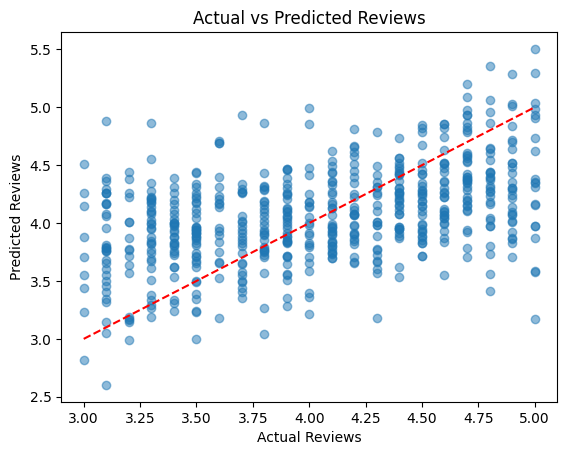

In [75]:
import matplotlib.pyplot as plt

# Plot predicted vs actual review averages
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Reviews')
plt.ylabel('Predicted Reviews')
plt.title('Actual vs Predicted Reviews')
plt.show()


In [76]:
def create_input_features_for_user(user_id, service_df, user_df, service_categories):
    user_row = user_df[user_df['user_id'] == user_id].iloc[0]
    city_services = service_df[service_df['city'] == user_row['city']]
    
    # Create features for each service the user might be interested in
    input_features = []
    
    for _, service_row in city_services.iterrows():
        if service_row['service_category'] in user_row['service_categories_interest']:
            distance = dist(
                (user_row['location_x'], user_row['location_y']),
                (service_row['provider_location_x'], service_row['provider_location_y'])
            )
            
            # Create the feature vector for this user-service pair
            service_preference_vector = [1 if service == service_row['service_category'] else 0 for service in service_categories]
            
            feature_vector = [
                user_row['user_id'], 
                service_row['service_id'],
                distance,
                service_row['click_count'],
                service_row['provider_age'],
                service_row['provider_experience'],
                *service_preference_vector
            ]
            
            input_features.append(feature_vector)
    
    return np.array(input_features)

# Example: For a specific user, generate the input features
user_id = 1001  # Example user ID
input_features = create_input_features_for_user(user_id, service_df, user_df, SERVICE_CATEGORIES)


In [81]:
# Convert input features to tensor
input_tensor = torch.tensor(input_features, dtype=torch.float32).to(device)

# Make predictions
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    predictions = model(input_tensor).cpu().numpy()

# Add predictions to the input data
input_features_with_predictions = np.hstack([input_features, predictions.reshape(-1, 1)])

# Sort the services by predicted rating (ascending order of predicted score)
recommended_services = sorted(input_features_with_predictions, key=lambda x: x[-1], reverse=True)

# Show the top recommended services
top_recommended_services = recommended_services[:5]  # Top 5 recommendations
for service in top_recommended_services:
    service_id = service[1]
    predicted_rating = service[-1]
    print(f"Service ID: {service_id}, Predicted Rating: {predicted_rating}")


Service ID: 640.0, Predicted Rating: 50.17988204956055
Service ID: 613.0, Predicted Rating: 49.83502960205078
Service ID: 635.0, Predicted Rating: 49.71550750732422
Service ID: 642.0, Predicted Rating: 49.707855224609375
Service ID: 625.0, Predicted Rating: 49.64268493652344


In [79]:
class RecommendationModel(nn.Module):
    def __init__(self, num_features):
        super(RecommendationModel, self).__init__()
        self.fc1 = nn.Linear(num_features, 128)  # Adjust this line based on input features size
        self.fc2 = nn.Linear(128, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [80]:
num_input_features = 21  # or 22 depending on your features
model = RecommendationModel(num_input_features).to(device)

